<a href="https://colab.research.google.com/github/Hoangthang017/CS114.K21/blob/master/Sarcasm/SarcasmDetection_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_json('/content/drive/My Drive/CS114/DataHeadline/Sarcasm_Headlines_Dataset.json',lines=True)

print(df.head())
print(len(df))

                                        article_link  ... is_sarcastic
0  https://www.huffingtonpost.com/entry/versace-b...  ...            0
1  https://www.huffingtonpost.com/entry/roseanne-...  ...            0
2  https://local.theonion.com/mom-starting-to-fea...  ...            1
3  https://politics.theonion.com/boehner-just-wan...  ...            1
4  https://www.huffingtonpost.com/entry/jk-rowlin...  ...            0

[5 rows x 3 columns]
26709


In [ ]:
df.isna().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

In [ ]:
del df['article_link']

In [ ]:
headline = df['headline']
print(headline)
head = headline[0]
headline = headline[1:]
print(head)
print(headline)
print(headline[1])

0        former versace store clerk sues over secret 'b...
1        the 'roseanne' revival catches up to our thorn...
2        mom starting to fear son's web series closest ...
3        boehner just wants wife to listen, not come up...
4        j.k. rowling wishes snape happy birthday in th...
                               ...                        
26704                 american politics in moral free-fall
26705                              america's best 20 hikes
26706                                reparations and obama
26707    israeli ban targeting boycott supporters raise...
26708                    gourmet gifts for the foodie 2014
Name: headline, Length: 26709, dtype: object
former versace store clerk sues over secret 'black code' for minority shoppers
1        the 'roseanne' revival catches up to our thorn...
2        mom starting to fear son's web series closest ...
3        boehner just wants wife to listen, not come up...
4        j.k. rowling wishes snape happy birthday 

In [ ]:
count = 0 
headline = df['headline']
new_data = []
l = len(headline)
for i in range(3):
  head = headline[i]
  print(head)
  headline = headline[1:]
  print(headline.head())
  if head in headline:
    count += 1
    new_data.append(head)


former versace store clerk sues over secret 'black code' for minority shoppers
1    the 'roseanne' revival catches up to our thorn...
2    mom starting to fear son's web series closest ...
3    boehner just wants wife to listen, not come up...
4    j.k. rowling wishes snape happy birthday in th...
5                          advancing the world's women
Name: headline, dtype: object
the 'roseanne' revival catches up to our thorny political mood, for better and worse
2    mom starting to fear son's web series closest ...
3    boehner just wants wife to listen, not come up...
4    j.k. rowling wishes snape happy birthday in th...
5                          advancing the world's women
6       the fascinating case for eating lab-grown meat
Name: headline, dtype: object
mom starting to fear son's web series closest thing she will have to grandchild
3    boehner just wants wife to listen, not come up...
4    j.k. rowling wishes snape happy birthday in th...
5                          advancing

In [ ]:
print(new_data)
print(count)

[]
0


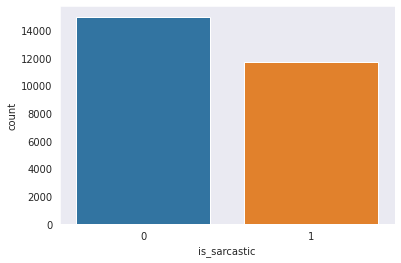

In [ ]:
sns.set_style('dark')
sns.countplot(df.is_sarcastic)

In [ ]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 

stop_words =set(stopwords.words("english"))
stemmer = PorterStemmer()
tokenizer = RegexpTokenizer(r'\w+')

def preprocess(text):
  word_list = []
  tok = tokenizer.tokenize(text)
  for word in tok:
    if word not in stop_words:
      word_list.append(stemmer.stem(word))
  return " ".join(word_list)


In [ ]:
x_data = df["headline"].apply(preprocess)
x_data.tail()

26704                       american polit moral free fall
26705                                 america best 20 hike
26706                                          repar obama
26707    isra ban target boycott support rais alarm abroad
26708                              gourmet gift foodi 2014
Name: headline, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, df['is_sarcastic'].values, test_size=0.10, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(X_train)
x_test_tfidf = vectorizer.transform(X_test)

In [ ]:
df_idf = pd.DataFrame(vectorizer.idf_, index=vectorizer.get_feature_names(),columns=["idf_weights"])
 
# sort ascending
df_idf.sort_values(by=['idf_weights']).tail()

,idf_weights
kasparov,10.394286
kassig,10.394286
kateb,10.394286
katherin,10.394286
ünite,10.394286


In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

In [ ]:
BernModel = BernoulliNB()
BernModel.fit(x_train_tfidf, y_train)
print(f"Training Score : {BernModel.score(x_train_tfidf, y_train)}")
print(f"Test Score : {BernModel.score(x_test_tfidf, y_test)}")

Training Score : 0.8857226058740327
Test Score : 0.8023212280044927


In [ ]:
LogModel = LogisticRegression()
LogModel.fit(x_train_tfidf,y_train)
print(f"Training Score : {LogModel.score(x_train_tfidf, y_train)}")
print(f"Test Score : {LogModel.score(x_test_tfidf, y_test)}")

Training Score : 0.8715783343040187
Test Score : 0.7877199550730064


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
df_test = pd.read_csv('/content/drive/My Drive/CS114/DataHeadline/Headlines_Data.csv')
print(df_test.head())

                                            Headline  label
0  Dog Owner Not Sure How City Expects Her To Pic...      1
1  Public Pressure Mounts For U.S. Government To ...      1
2  Huh, Boyfriend’s Ex Just Made Interesting Hair...      1
3  ‘It’s Perfect Outside,’ Announces Sweating Wom...      1
4  Man Hates How Hot Dog-Eating Contests Reduce A...      1


In [ ]:
df_test = df_test.sample(frac=1).reset_index(drop=True)

In [ ]:
df_test = df_test[:2000]

In [ ]:
print(len(df_test))


2000


In [ ]:
x1_test=df_test['Headline'].apply(preprocess)
x1_test_tfidf = vectorizer.transform(x1_test)
x1_test_tfidf

<2000x16540 sparse matrix of type '<class 'numpy.float64'>'
	with 17889 stored elements in Compressed Sparse Row format>

In [ ]:
print(f"Training Score : {LogModel.score(x_train_tfidf, y_train)}")
print(f"Test Score : {LogModel.score(x1_test_tfidf, df_test['label'])}")

Training Score : 0.8715783343040187
Test Score : 0.7175


In [ ]:
count = 0
